# EDA

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option("display.precision", 1)
import tikzplotlib

In [0]:
#load data
data = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/Rsample_1M.csv")

In [0]:
data.head()

,userID,movieID,rating
0,1567202,1,2
1,55016,1,3
2,1348967,1,2
3,320540,1,2
4,1077982,1,4


Basic information

In [0]:
data.info() # 1M ratings and not NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   userID   1000000 non-null  int64
 1   movieID  1000000 non-null  int64
 2   rating   1000000 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


See number of users and movies

In [0]:
cust_count = data['userID'].nunique()
movie_count = data["movieID"].nunique()
print("number of users:",cust_count,"\nnumber of movies:",movie_count)

number of users: 289901 
number of movies: 16273


Info about ratings

In [0]:
data["rating"].describe() # same as the whole dataset

count    1000000.0
mean           3.6
std            1.1
min            1.0
25%            3.0
50%            4.0
75%            4.0
max            5.0
Name: rating, dtype: float64

Rating distribution

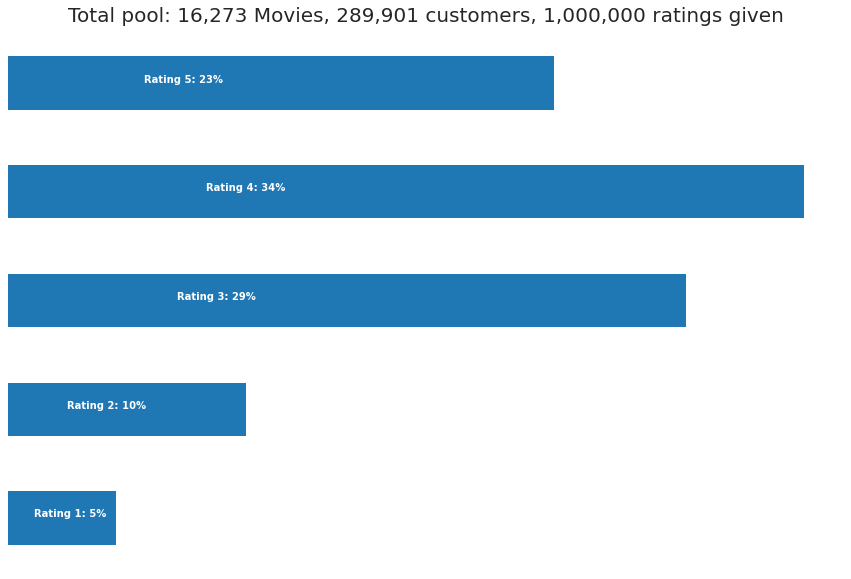

In [0]:
p = data.groupby('rating')['rating'].agg(['count']) # count
rating_count = data['rating'].count()
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')
for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i,
                                      p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')
#tikzplotlib.save("/content/drive/My Drive/Thesis/Git_repo/images/rating_distribution.tex")
plt.savefig("/content/drive/My Drive/Thesis/Git_repo/images/rating_distribution.pdf", bbox_inches='tight')

Analysing Number of ratings given by some user

In [0]:
no_of_rated_movies_per_user = data.groupby(by='userID')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

userID
305344     172
387418     168
1664010    156
2439493    155
2118461    141
Name: rating, dtype: int64

In [0]:
no_of_rated_movies_per_user.describe()

count    289901.0
mean          3.4
std           3.7
min           1.0
25%           1.0
50%           2.0
75%           4.0
max         172.0
Name: rating, dtype: float64

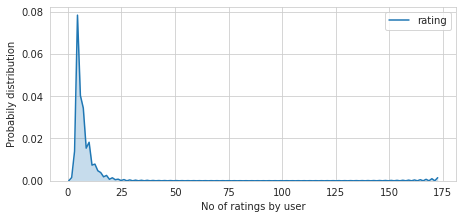

In [0]:
fig = plt.figure(figsize=plt.figaspect(0.2))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.ylabel('Probabily distribution')
#plt.title("PDF")

#ax2 = plt.subplot(122)
#sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
#plt.xlabel('No of ratings by user')
#plt.title('CDF')

plt.show()
fig.savefig("/content/drive/My Drive/Thesis/Git_repo/images/no_of_rated_movies_per_user.pdf", bbox_inches='tight')

Analysing Number of ratings that a movie got by users

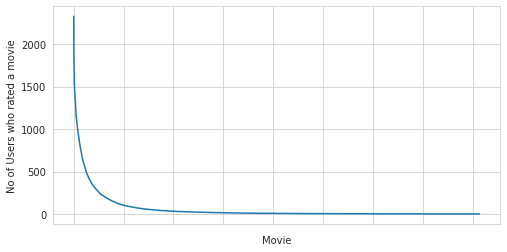

In [0]:
no_of_ratings_per_movie = data.groupby(by='movieID')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
#plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()
fig.savefig("/content/drive/My Drive/Thesis/Git_repo/images/no_of_ratings_per_movie.pdf", bbox_inches='tight')

In [0]:
no_of_ratings_per_movie.head()

movieID
5317     2328
15124    2119
14313    2062
1905     1925
6287     1915
Name: rating, dtype: int64

In [0]:
no_of_ratings_per_movie.describe()

count    16273.0
mean        61.5
std        175.2
min          1.0
25%          2.0
50%          7.0
75%         31.0
max       2328.0
Name: rating, dtype: float64